## In Class Lab

**Load packages**

In [16]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist, pdist

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Load Data**

In [2]:
df = pd.read_csv('[UCI] AAAI-14 Accepted Papers - Papers.csv')

In [4]:
df.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
title       398 non-null object
authors     398 non-null object
groups      396 non-null object
keywords    398 non-null object
topics      394 non-null object
abstract    398 non-null object
dtypes: object(6)
memory usage: 18.7+ KB


In [6]:
df.describe()

,title,authors,groups,keywords,topics,abstract
count,398,398,396,398,394,398
unique,398,391,125,398,350,398
top,Locality Preserving Hashing,"Deguang Kong, Chris Ding and Qihe Pan",Novel Machine Learning Algorithms (NMLA),influence maximization\nviral marketing\nindep...,GTEP: Social Choice / Voting,Applications of qualitative reasoning to engin...
freq,1,3,50,1,7,1


**Making Data Frame as a Function of Groups**

In [12]:
s = df['groups'].str.split('\n').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'groups'
del df['groups']
df = df.join(s).reset_index()

**Adding New Variable for Membership**

In [13]:
df['flags'] = pd.Series(np.ones(len(df)),
index=df.index)
df.head()

,index,title,authors,keywords,topics,abstract,groups,flags
0,0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...,Novel Machine Learning Algorithms (NMLA),1.0
1,1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...,AI and the Web (AIW),1.0
2,1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...,Novel Machine Learning Algorithms (NMLA),1.0
3,2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...,Game Theory and Economic Paradigms (GTEP),1.0
4,3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...,NLP and Text Mining (NLPTM),1.0


**Creating Matrix using Flags**

In [23]:
dist_mat = df.pivot_table(index = ['title'], columns=['groups'], values='flags')
dist_mat = dist_mat.fillna(0).reset_index()
x_cols = dist_mat.columns[1:]

dist_mat.head()

groups,title,AI and the Web (AIW),Applications (APP),Cognitive Modeling (CM),Cognitive Systems (CS),Computational Sustainability and AI (CSAI),Game Playing and Interactive Entertainment (GPIE),Game Theory and Economic Paradigms (GTEP),Heuristic Search and Optimization (HSO),Human-Computation and Crowd Sourcing (HCC),...,Multiagent Systems (MAS),NLP and Knowledge Representation (NLPKR),NLP and Machine Learning (NLPML),NLP and Text Mining (NLPTM),Novel Machine Learning Algorithms (NMLA),Planning and Scheduling (PS),Reasoning under Uncertainty (RU),Robotics (ROB),Search and Constraint Satisfaction (SCS),Vision (VIS)
0,"""Source Free"" Transfer Learning for Text Class...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,A Characterization of the Single-Peaked Single...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"A Computational Method for (MSS,CoMSS) Partiti...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,A Control Dichotomy for Pure Scoring Rules,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A Convex Formulation for Semi-supervised Multi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Elbow plot to determine optimum number of Clusters**

Text(0.5,1,'Elbow for KMeans clustering')

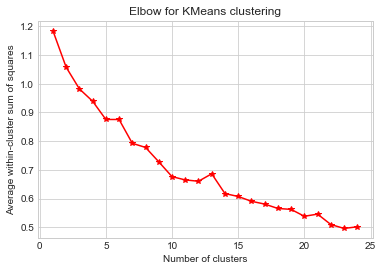

In [24]:
X = dist_mat[x_cols]

# Range of k
K = range(1,25)

KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]

# Calculating average sume of withing SS
avgWSS = [sum(d)/X.shape[0] for d in dist]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWSS, 'r*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

**Applying K-Means**

In [26]:
X = dist_mat[x_cols]

# Optimum Clusters are 10
cluster = KMeans(n_clusters = 10, random_state = 2)

dist_mat['cluster'] = cluster.fit_predict(X)
dist_mat.cluster.value_counts()

1    77
0    69
2    60
6    33
4    31
9    30
5    30
7    27
8    22
3    17
Name: cluster, dtype: int64